# **TR-2020/03 - Technical report: Preprocessing of SSC hospitalizations database**

|Technical Report ID  |2020/03|
|--|--|
| Title |Preprocessing of SSC Hospitalizations Database|
| Authors | Júlia De Lázari, Paula Dornhofer|
| Creation Date| 2020 - 09|


## Database Description

The hospitalizations database is from SSC (Health Secretary of Campinas - Secretaria de Saúde de Campinas). It contains data from 2013 to 2018 of all hospitalizations in which solicitant, executant or final health units are from Campinas.

The original database has 55240 rows and 42 columns.

This report presents an exploratory analysis of the database and its variables. Some problems and inconsistences were found and attempts to solve them were made, in order to increase the quality of the data.

## RAW Database Diagnostic

The exploratory analysis revelead that this database has inconsistences such as duplicated rows, rows with missing birthdates, rows from before 2013, rows from outside Campinas. This report details all the analysis made, as well as the data processing.

## Results

As a result, three subsets of the original database were generated:

- **hospitalizações_completo.csv:** database with hospitalizations from all causes, excluding duplicated rows, rows with sex as 'I', rows without birthdate, rows with date of solicitation from before 2013, rows refering to the same patient on the same day (the first occurence was preserved) and rows with regionalization from outside Campinas. Only relevant columns were preserved.  Columns that can identify the patient were drop due to confidentiality reasons.

- **hospitalizações_circulatório.csv:** subset of hospitalizações_completo.csv, with only hospitalizations with circulatory ICDs (I00-I99).

- **hospitalizações_respiratório.csv:** subset of hospitalizações_completo.csv, with only hospitalizations with respiratory ICDs (J00-J99).

## Read data 

In [ ]:
#-------------------------------------------------------------------#
#                       Import libraries                            #
#-------------------------------------------------------------------#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

pd.options.mode.chained_assignment = None 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#-------------------------------------------------------------------#
#              Load dataframe - Hospitalizações SSC                 #
#-------------------------------------------------------------------#
df_hosp = pd.read_excel('hospitalizacoes_RAW.xlsx')
print("Length dataframe:",len(df_hosp))
df_hosp.columns

Length dataframe: 55240


Index(['Nº ficha', 'Tipo de Ficha', 'Tipo Solicitação',
       'Classificação de Risco', 'Data/Hora Solicitação',
       'Data/Hora Finalização', 'Tempo de Resolução (hora/min)', 'Judicial',
       'Código Paciente', 'CNS', 'Nome do Paciente', 'Sexo', 'Idade',
       'Data Nascimento', 'TARM/PAD', 'Regulador Inicial', 'Regulador Final',
       'Transp.', 'Forma de Resolução', 'Médico Receptor', 'CID 1',
       'Descrição CID 1', 'CID 2', 'Descrição CID 2',
       'Tipo de Recurso Solicitado 1', 'Recurso Solicitado 1', 'RRAS',
       'Complexo Solicitante', 'DRS Solicitante', 'CGR Solicitante',
       'Município Solicitante', 'CNES Solicitante', 'Unidade Solicitante',
       'RRAS2', 'Complexo Executante', 'DRS Executante', 'CGR Executante',
       'Município Executante', 'CNES Executante', 'Unidade Executante',
       'Tipo de Fechamento', 'Local Regulação'],
      dtype='object')

###  Patient information

**Nº ficha** (record number)

Each hospitalization has a record with a different number. Rows with the same number should be discarded to avoid duplicity.


**Problem:**
- There are 40 rows totally duplicated (duplicated in pairs)

**Solution:**
- Only the first occurence was kept



In [ ]:
#check for null rows
print("Rows without Nº de ficha:",len(df_hosp[df_hosp['Nº ficha'].isnull()]))
#check for duplicated rows
print("Rows with Nº de ficha duplicated:",len(df_hosp[df_hosp['Nº ficha'].duplicated(keep = False)]))
print("Duplicated rows (all columns duplicated):",len(df_hosp[df_hosp.duplicated(keep = False)]))

#keep only the first occurence
df_hosp = df_hosp.drop_duplicates(keep='first')

Rows without Nº de ficha: 0
Rows with Nº de ficha duplicated: 40
Duplicated rows (all columns duplicated): 40


**Código Paciente**(patient code) and **Nome do Paciente**(patient name)

All duplicated values refers to the same patient (same name and birthdate). 

But there are patients with differents codes (different code in different hospitalization). 

Not a trustworthy variable to identify patients.




In [ ]:
#check for null rows
print("Rows without patient code:",len(df_hosp[df_hosp['Código Paciente'].isnull()]))
print("Rows without patient name:",len(df_hosp[df_hosp['Nome do Paciente'].isnull()]))

#check for duplicated rows
print("Rows without patient code duplicated:",len(df_hosp[df_hosp['Código Paciente'].duplicated(keep = False)]))
print("Rows without patient name:",len(df_hosp[df_hosp['Nome do Paciente'].duplicated(keep = False)]))
print("Rows without patient code and patient name duplicated:",len(df_hosp[df_hosp.duplicated(['Nome do Paciente','Código Paciente'],keep = False)]))

#unique values
print("Number of unique values for patient code:",len(df_hosp['Código Paciente'].unique()))
print("Number of unique values for patient name:",len(df_hosp['Nome do Paciente'].unique()))

Rows without patient code: 0
Rows without patient name: 0
Rows without patient code duplicated: 23804
Rows without patient name: 28100
Rows without patient code and patient name duplicated: 23779
Number of unique values for patient code: 40316
Number of unique values for patient name: 36920


**CNS (Número do Cartão Nacional de Saúde)** (Number of National Security Card)

**Problems:**
- Rows with CNS as '-'
- Rows with same CNS refering to different patients
- Different CNS to the same patient

Also, not a thrustworthy column to identify patients

In [ ]:
#check for null rows
print("Rows without CNS:",len(df_hosp[df_hosp['CNS'] == '-']))

#check for duplicated rows
print("rows with CNS duplicated:",len(df_hosp[df_hosp['CNS'].duplicated(keep = False)]))

print("Rows with CNS, patient name and birthdate duplicated:",len(df_hosp[df_hosp.duplicated(['CNS','Nome do Paciente','Data Nascimento'],keep = False)]))
print("Rows with patient name and birthdate duplicated:",len(df_hosp[df_hosp.duplicated(['Nome do Paciente','Data Nascimento'],keep = False)]))

#unique values
print("Number of unique values for CNS:",len(df_hosp['CNS'].unique()))
print("Number of unique values for patient name:",len(df_hosp['Nome do Paciente'].unique()))

Rows without CNS: 9883
rows with CNS duplicated: 31897
Rows with CNS, patient name and birthdate duplicated: 24063
Rows with patient name and birthdate duplicated: 26210
Number of unique values for CNS: 31275
Number of unique values for patient name: 36920


**Idade**(Age) e **Data Nascimento**(Birthdate)

Recalculate age as Data/Hora Solicitação (Date/Time solicitation) - Data Nascimento (Birthdate) and compare with the age columns

**Problem:**
- Age column present errors and inconsistences.

**Solution:**
- Drop rows without birthdate and recalculate age as Data/Hora Solicitação - Data Nascimento.

In [ ]:
#columns in datetime format
df_hosp.loc[:,'Data/Hora Solicitação'] = pd.to_datetime(df_hosp.loc[:,'Data/Hora Solicitação'],dayfirst=True)
df_hosp.loc[:,'Data Nascimento'] = pd.to_datetime(df_hosp.loc[:,'Data Nascimento'],dayfirst=True,errors = 'coerce')

#check for rows with null values
print("Rows without age:",len(df_hosp[df_hosp['Idade'].isnull()]))
print("Rows without birthdate:",len(df_hosp[df_hosp['Data Nascimento'].isnull()]))

#check for absurd values in age column
print("Rows with age above 120 years:",len(df_hosp[df_hosp['Idade']>120]))

#drop rows without birthdate and recalculate age
df_hosp = df_hosp[~df_hosp['Data Nascimento'].isnull()]
df_hosp['Idade'] = df_hosp['Data/Hora Solicitação'] - df_hosp['Data Nascimento']
df_hosp['Idade'] = df_hosp['Idade'].dt.days
df_hosp['Idade'] = df_hosp['Idade']//365.25 #convert days into years

Rows without age: 819
Rows without birthdate: 925
Rows with age above 120 years: 7


**Sex** 

Rows with sex as 'I' were discarded.

In [ ]:
#drop rows with sex as 'I'
print("Rows with sex=='I':",len(df_hosp[df_hosp['Sexo']=='I']))
df_hosp = df_hosp[df_hosp['Sexo']!='I']

Rows with sex=='I': 23


### Record information
**Tipo de Ficha**, **Tipo Solicitação**, **Classificação de Risco**, **Data/Hora Solicitação**, **Data/Hora Finalização** , **Tempo de Resolução (hora/min)** , **Judicial**, **Tipo de Fechamento** , **Local Regulação**

No null rows. These columns are not relevant for the intended analysis.


In [ ]:
#Record information

print("Number of null rows")
print("Tipo de ficha:",len(df_hosp[df_hosp['Tipo de Ficha'].isnull()]))
print("Tipo Solicitação:",len(df_hosp[df_hosp['Tipo Solicitação'].isnull()]))
print("Classificação de Risco:",len(df_hosp[df_hosp['Classificação de Risco'].isnull()]))
print("Data/Hora Solicitação:",len(df_hosp[df_hosp['Data/Hora Solicitação'].isnull()]))
print("Data/Hora Finalização:",len(df_hosp[df_hosp['Data/Hora Finalização'].isnull()]))
print("Tempo de Resolução (hora/min):",len(df_hosp[df_hosp['Tempo de Resolução (hora/min)'].isnull()]))
print("Judicial;",len(df_hosp[df_hosp['Judicial'].isnull()]))
print("Tipo de Fechamento:",len(df_hosp[df_hosp['Tipo de Fechamento'].isnull()]))
print("Local Regulação:",len(df_hosp[df_hosp['Local Regulação'].isnull()]))


Number of null rows
Tipo de ficha: 0
Tipo Solicitação: 0
Classificação de Risco: 0
Data/Hora Solicitação: 0
Data/Hora Finalização: 0
Tempo de Resolução (hora/min): 0
Judicial; 0
Tipo de Fechamento: 0
Local Regulação: 0


### Mediacl staff information

**TARM/PAD**, **Regulador inicial**, **Médico receptor** do not have null rows.

**Regulador final** and **Transp.** have null rows.

These columns are not relevant for the intended analysis.



In [ ]:
# Medical staff information

print("Number of null rows")
print("TARM/PAD:",len(df_hosp[df_hosp['TARM/PAD'].isnull()]))
print("Regulador Inicial:",len(df_hosp[df_hosp['Regulador Inicial'].isnull()]))
print("Regulador Final:",len(df_hosp[df_hosp['Regulador Final'].isnull()]))
print("Transp.:",len(df_hosp[df_hosp['Transp.'].isnull()]))
print("Médico Receptor:",len(df_hosp[df_hosp['Médico Receptor'].isnull()]))

Number of null rows
TARM/PAD: 0
Regulador Inicial: 0
Regulador Final: 14655
Transp.: 0
Médico Receptor: 28030


### Medical information

**CID1:** primary ICD 

**CID2:** secondary ICD (not filled in all rows)

**Tipo de Recurso Solicitado 1** and **Recurso solicitado 1** do not have null rows.

In [ ]:
# Medical information

print("Number of null rows")
print("CID 1:",len(df_hosp[df_hosp['CID 1'].isnull()]))
print("Descrição CID 1:",len(df_hosp[df_hosp['Descrição\xa0CID\xa01'].isnull()]))
print("CID 2:",len(df_hosp[df_hosp['CID 2'].isnull()]))
print("Descrição CID 2:",len(df_hosp[df_hosp['Descrição\xa0CID\xa02'].isnull()]))
print("Tipo de Recurso Solicitado 1:",len(df_hosp[df_hosp['Tipo de Recurso Solicitado 1'].isnull()]))
print("Recurso Solicitado 1:",len(df_hosp[df_hosp['Recurso Solicitado 1'].isnull()]))

Number of null rows
CID 1: 0
Descrição CID 1: 1
CID 2: 26511
Descrição CID 2: 26535
Tipo de Recurso Solicitado 1: 0
Recurso Solicitado 1: 0


### Location of health units

This database has data from hospitalization in which solicitant, executant or final units are from Campinas.



**RRAS**(type of regionalization)

RRAS15 e RRAS16 refers to Campinas.

**Problem:**
- 83 row with RRAS from outside Campinas.

**Solution:**
- Discard these rows.

In [ ]:
#check for null rows
print("Rows without RRAS:",len(df_hosp[df_hosp['RRAS'].isnull()]))

#convert to str
df_hosp.loc[:,'RRAS'] = df_hosp.loc[:,'RRAS'].astype(str)

#drop rows with RRAS not from Campinas
print("Rows with RRAS from Campinas(RRAS15 ou RRAS16):",len(df_hosp[df_hosp['RRAS'].str.contains('RRAS15|RRAS16')]))
print("Rows with RRAS from outside Campinas:",len(df_hosp[~df_hosp['RRAS'].str.contains('RRAS15|RRAS16')]))
df_hosp = df_hosp[df_hosp.loc[:,'RRAS'].str.contains('RRAS15|RRAS16')]

Rows without RRAS: 0
Rows with RRAS from Campinas(RRAS15 ou RRAS16): 54189
Rows with RRAS from outside Campinas: 83


**Complexo solicitante**(type of regionalization)

CMRR5-Centro-Leste refers to Campinas.

**Problem:**
- 365 rows with complexo solicitante from outside Campinas.

**Solution:**
- Discard these rows.

In [ ]:
#check for null rows
print("Rows without complexo solicitante:",len(df_hosp[df_hosp['Complexo Solicitante'].isnull()]))

#drop rows with requesting complex not from Campinas
print("Rows with complexo solicitante from Campinas (CMRR 5 - CENTRO-LESTE):",len(df_hosp[df_hosp['Complexo Solicitante']=='CMRR 5 - CENTRO-LESTE']))
print("Rows with complexo solicitante from outside Campinas:",len(df_hosp[df_hosp['Complexo Solicitante']!='CMRR 5 - CENTRO-LESTE']))
df_hosp = df_hosp[df_hosp['Complexo Solicitante']=='CMRR 5 - CENTRO-LESTE']

Rows without complexo solicitante: 0
Rows with complexo solicitante from Campinas (CMRR 5 - CENTRO-LESTE): 53827
Rows with complexo solicitante from outside Campinas: 362


**DRS Solicitante**(type of regionalization)

DRS VII refers to Campinas. No null rows or with DRS Solicitante different from DRS VII

In [ ]:
print("Rows with null requesting complex:",len(df_hosp[df_hosp['DRS Solicitante'].isnull()]))
print("Rows with requesting complex different from Campinas (DRS VII - CAMPINAS):",len(df_hosp[df_hosp['DRS Solicitante']!='DRS VII - CAMPINAS']))

Rows with null requesting complex: 0
Rows with requesting complex different from Campinas (DRS VII - CAMPINAS): 0


## Others

Columns refering to the place of hospitalization. Not relevant for the intended analysis.

In [ ]:
print("Number of null rows")
print("RRAS2:",len(df_hosp[df_hosp['RRAS2'].isnull()]))
print("Complexo Executante:",len(df_hosp[df_hosp['Complexo Executante'].isnull()]))
print("DRS Executante:",len(df_hosp[df_hosp['DRS Executante'].isnull()]))
print("CGR Executante:",len(df_hosp[df_hosp['CGR Executante'].isnull()]))
print("Município Executante:",len(df_hosp[df_hosp['Município Executante'].isnull()]))
print("CNES Executante:",len(df_hosp[df_hosp['CNES Executante'].isnull()]))
print("Unidade Executante:",len(df_hosp[df_hosp['Unidade Executante'].isnull()]))

Number of null rows
RRAS2: 24439
Complexo Executante: 24439
DRS Executante: 24439
CGR Executante: 24439
Município Executante: 24439
CNES Executante: 24439
Unidade Executante: 24439


### Date

Split column **Data/Hora Solicitação** (Date/Hour Solicitation), one for date and one for hour.

Drop a row with date from before 2013.

In [ ]:
#convert to datetime format
df_hosp.loc[:,'Data/Hora Solicitação'] = df_hosp.loc[:,'Data/Hora Solicitação'].astype(str)
df_hosp.loc[:,'Data'] = df_hosp.loc[:,'Data/Hora Solicitação'].str.split().str[0]
df_hosp.loc[:,'Hora'] = df_hosp.loc[:,'Data/Hora Solicitação'].str.split().str[1]

#drop rows from before 2013
print("Data anterior a 2013:",len(df_hosp[df_hosp['Data']<'2013-01-01']))
df_hosp = df_hosp[df_hosp['Data']>'2013-01-01']

Data anterior a 2013: 1


Hospitalizations per year, 2013 has an unusual lower number.

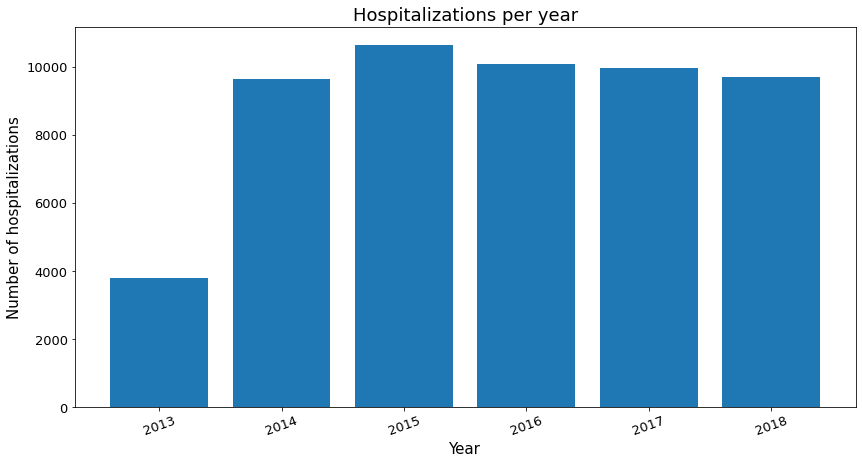

In [ ]:
#-------------------------------------------------------------------#
#                    Hospitalizations per year                      #
#-------------------------------------------------------------------#

#get absolute value of hospitalizations per year
df_hosp['Data'] = pd.to_datetime(df_hosp['Data'])
year = pd.DataFrame(df_hosp['Data'].dt.strftime('%Y').value_counts())
year = year.reset_index()
year = year.sort_values(by=['index'])
year = year.rename(columns={'index':'Year','Data':'Count'})

#plot
plt.figure(figsize = (14,7))
plt.bar(year['Year'],year['Count'])
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Number of hospitalizations',fontsize = 15)
plt.title('Hospitalizations per year',fontsize=18)
plt.xticks(fontsize = 13, rotation = 20)
plt.yticks(fontsize = 13)
plt.show()

### Número Paciente (identificador) - Patient number

A new column (**Número Paciente**) was created to identify patients that appear more than once.

This column was constructed by joining one string correponding to the name of the patient and one for the birthdate. Each unique pair of name and birthdate was considered as an unique patient (and has an unique value in this new column).



In [ ]:
#create the identifier column based on name and birthdate

#.cat.codes creates a column for each name and then for each birthdate
str_name = df_hosp.loc[:,'Nome do Paciente'].astype('category').cat.codes.astype(str)
str_birthdate = df_hosp.loc[:,'Data Nascimento'].astype('category').cat.codes.astype(str)

# by joining these two string we obtain a unique str for each individual
df_hosp['Número Paciente'] = str_name + str_birthdate

### Hospitalizations at the same day

**Problem:**
- Patients with more than one record at the same day should not be considered more than once.

**Solution:**
- Only the first occurence was kept (632 rows discarded).

In [ ]:
#drop rows refering to the same patient at the same day
print(len(df_hosp[df_hosp.duplicated(['Data','Número Paciente'], keep = 'first')]), "rows were dropped")
df_hosp = df_hosp.drop_duplicates(['Data','Número Paciente'], keep = 'first')

632 rows were dropped


## City and year

Keep only data from Campinas (solicitant city as Campinas, meaning the patient arrived at a Campinas health unit) and from 2014 foward. This choice was made in order to keep a higher quality for the regional analysis intended.


In [ ]:
#city of solicitation as Campinas
df_hosp = df_hosp[df_hosp['Município Solicitante']=='Campinas']

#from 2001 foward
df_hosp = df_hosp[df_hosp['Data']>='2014-01-01']

## Drop columns and save

Drop irrelevant coluns for the intended analysis.

In [ ]:
#drop unneded columns
df_hosp = df_hosp.drop(columns= {'Nº ficha','Tipo de Ficha', 'Tipo Solicitação','TARM/PAD',
                                'Regulador Inicial','Judicial','Código Paciente', 'CNS', 'Data Nascimento',
                                'Data/Hora Solicitação', 'Data/Hora Finalização','Tempo de Resolução (hora/min)',
                                'Nome do Paciente', 'Regulador Final','Transp.','Médico Receptor',
                                'RRAS','Complexo Solicitante', 'DRS Solicitante', 'CGR Solicitante',
                                'Município Solicitante', 'CNES Solicitante', 'Unidade Solicitante',
                                'RRAS2', 'Complexo Executante', 'DRS Executante', 'CGR Executante',
                                'Município Executante', 'CNES Executante', 'Unidade Executante','Local Regulação',
                                'Tipo de Recurso Solicitado 1','Recurso Solicitado 1','Tipo de Fechamento',
                                'CID 2','Descrição\xa0CID\xa02','Forma de Resolução','Classificação de Risco'})
#rename columns
df_hosp = df_hosp.rename(columns = {'CID\xa01':'CID', 'Descrição\xa0CID\xa01': 'Descrição CID'})

## Save csv

In [ ]:
df_hosp = df_hosp[['Data','Hora','Número Paciente','Sexo','Idade','CID','Descrição CID']]
df_hosp.to_csv('hospitalizações_completo.csv')

## Circulatory

Subset with ICDs from I00 to I99.

In [ ]:
df_circ = df_hosp[df_hosp['CID'].str.contains('I')]
df_circ = df_circ[['Data','Hora','Número Paciente','Sexo','Idade','CID','Descrição CID']]
df_circ.to_csv('hospitalizações_circulatório.csv')

## Respiratory

Subset with ICDs from J00 to J99.

In [ ]:
df_resp = df_hosp[df_hosp['CID'].str.contains('J')]
df_resp = df_resp[['Data','Hora','Número Paciente','Sexo','Idade','CID','Descrição CID']]
df_circ.to_csv('hospitalizações_respiratório.csv')